In [1]:
import pandas as pd 

# import 'numpy' 
import numpy as np

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest 

In [2]:
df=pd.read_csv('fifa_stats.csv')
df.head(5)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df.Club.fillna(method='ffill',inplace=True)

In [4]:
df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

In [5]:
#Answer 1

population=df.Age.to_list()
sample=np.random.choice(population,200)
print('Sampling Mean :',np.mean(sample))
print('Standard Error:',np.std(sample))

print('--'*17)

print('Population Mean :',df.Age.mean())
print('Population Std.Dev:',df.Age.std())


#Increasing in sample, try possible way to included normal variations with standard changes.
#Due to that Population Mean and Standard Dev. of Population is almost same as to sampling.

Sampling Mean : 27.44
Standard Error: 3.9769837817119646
----------------------------------
Population Mean : 27.2315
Population Std.Dev: 3.8590612753574423


In [6]:
# Answer 2

#H1 > 80
#H0 <=80

Rating=df['Overall_rating'].to_list()
n=len(df)
mu=80
x_bar=df.Overall_rating.mean()
sigma=df.Overall_rating.std()

In [7]:
z_stats=(x_bar-mu)/(sigma/n**0.5)
print('Z_stats :',z_stats)

z_critical=stats.norm.isf(0.05)
print('Z_critical :',z_critical)

print('--'*17)

p_value=stats.norm.cdf(z_stats)
print('P_value :',p_value)


#Reject H0
#Not Greater Than 80

Z_stats : -24.538460498672645
Z_critical : 1.6448536269514729
----------------------------------
P_value : 2.8718642827629733e-133


In [85]:
# Answer C

#H1: Are Not Independent
#H0 : Independent

observed_values=pd.crosstab(df['Preferred Foot'],df['Potential'])

z_stats,p_value,ddof,expected_values=chi2_contingency(observed_values,correction=False)
print('Ch_stats :',z_stats)
print('P_value :',p_value)

print('--'*15)

print('Z_critical :',stats.chi2.isf(0.05,20))


# Fail to Reject
# Both are Independent

Ch_stats : 29.55053700074528
P_value : 0.07747130218941192
------------------------------
Z_critical : 31.41043284423092


<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

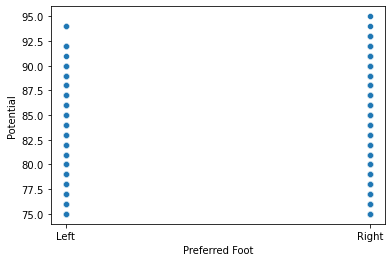

In [84]:
sns.scatterplot(df['Preferred Foot'],df['Potential'])

# No Relationship

In [63]:
# Answer D

#H1: Are Not Independent
#H0 : Independent

observed_values=pd.crosstab(df['Overall_rating'],df['Potential'])
#ddof=360

z_stats,p_value,ddof,expected_values=chi2_contingency(observed_values,correction=False)
print('Ch_stats :',z_stats)
print('P_value :',p_value)

print('--'*15)

print('Z_critical :',stats.chi2.isf(0.05,360))


# Reject H0
# Both are not Independent

Ch_stats : 8592.974091115166
P_value : 0.0
------------------------------
Z_critical : 405.24350231839315


In [65]:
# Answer E

observed_values=pd.crosstab(df['Skill Moves'],df['Overall_rating']).shape
#ddof=72

z_stats,p_value,ddof,expected_values=chi2_contingency(observed_values,correction=False)
print('Ch_stats :',z_stats)
print('P_value :',p_value)

print('--'*15)

print('Z_critical :',stats.chi2.isf(0.05,72))


# Reject H0
# Both are not Independent

Ch_stats : 0.0
P_value : 1.0
------------------------------
Z_critical : 92.80827038310773


<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

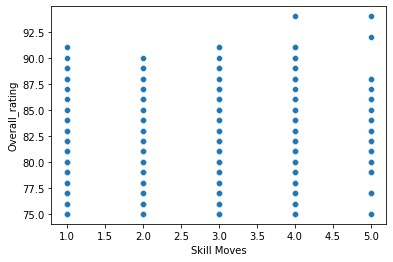

In [72]:
sns.scatterplot(x=df['Skill Moves'],y=df['Overall_rating'])

# Network Dataset

In [87]:
df1=pd.read_csv('phone.csv')
df1.head(5)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [123]:
df1['date']=pd.to_datetime(df1['date'])
df1['month']=pd.to_datetime(df1['month'])
df1.dtypes

date            datetime64[ns]
duration               float64
item                    object
month           datetime64[ns]
network                 object
network_type            object
dtype: object

In [92]:
df1.columns[df1.isnull().any()]

Index([], dtype='object')

In [141]:
# Answer A

# For 95%
x_bar=df1['duration'].mean()
sigma=df1['duration'].std()
n=len(df1)

print('Confidence Interval for 95% are:',stats.norm.interval(0.95,x_bar,sigma/n**0.5))

print('--'*37)

print('Confidence Interval for 99% are :',stats.norm.interval(0.99,x_bar,sigma/n**0.5))

# Confidence Interval for 99% are much more wider than that of Confidence Interval for 95%.

Confidence Interval for 95% are: (141.1778397288302, 147.4320313908407)
--------------------------------------------------------------------------
Confidence Interval for 99% are : (140.19523500408818, 148.41463611558274)


In [134]:
# Answer B

print('Data is not normally distributed :',stats.shapiro(df1['date'])[1])
print('Data is normally distributed :', stats.shapiro(df1['duration'])[1])
print('Data is not normally distributed :',stats.shapiro(df1['month'])[1])

Data is not normally distributed : 2.806794879343099e-17
Data is normally distributed : 0.701244592666626
Data is not normally distributed : 2.1400605178679167e-24


<AxesSubplot:ylabel='Density'>

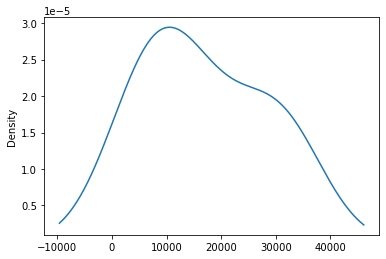

In [146]:
# Answer C

df1.groupby(by='network').sum()['duration'].plot(kind='kde')

# Distribution of duration w.r.t to netwrorks represent that data is normally distributed.

In [149]:
stats.shapiro(df1.groupby(by='network').sum()['duration'])

# And, From shapiro test we get to know that data is normally distributed.

ShapiroResult(statistic=0.8962633609771729, pvalue=0.30895206332206726)

In [156]:
df1.network.value_counts()
grp_a=df1[df1['network']=='Vodafone']['duration']
grp_b=df1[df1['network']=='Three']['duration']
grp_c=df1[df1['network']=='data']['duration']
grp_d=df1[df1['network']=='Meteor']['duration']
grp_e=df1[df1['network']=='Tesco']['duration']
grp_f=df1[df1['network']=='landline']['duration']
grp_g=df1[df1['network']=='voicemail']['duration']

In [159]:
# For Normally Distribution

print('Data is normally distributed :',stats.shapiro(grp_a)[1])
print('Data is normally distributed :',stats.shapiro(grp_b)[1])
print('Data is normally distributed :',stats.shapiro(grp_c)[1])
print('Data is normally distributed :',stats.shapiro(grp_d)[1])
print('Data is normally distributed :',stats.shapiro(grp_e)[1])
print('Data is normally distributed :',stats.shapiro(grp_f)[1])
print('Data is normally distributed :',stats.shapiro(grp_g)[1])

Data is normally distributed : 0.3013075590133667
Data is normally distributed : 0.47072795033454895
Data is normally distributed : 0.48521795868873596
Data is normally distributed : 0.7697541117668152
Data is normally distributed : 0.5880236029624939
Data is normally distributed : 0.6510748267173767
Data is normally distributed : 0.31774839758872986


In [162]:
#For Variance
print('Variance are equal:',stats.levene(grp_a,grp_b,grp_c,grp_d,grp_e,grp_f,grp_g)[1])

Variance are equal: 0.1653481809327658


In [165]:
f_stats,p_value=stats.f_oneway(grp_a,grp_b,grp_c,grp_d,grp_e,grp_f,grp_g)
print('f_stats :',f_stats)
print('P_value :',p_value)

print('--'*16)

print('f_critical :',stats.f.isf(0.05,6,len(df1)-7))

# Fail to Reject

f_stats : 1.4036497792001215
P_value : 0.2102939953009413
--------------------------------
f_critical : 2.1097142075162147


In [154]:
# Answer D

observed_values=pd.crosstab(df1['network'],df1['duration'])
#ddof=4914

In [167]:
z_stats,p_value,ddof,expected_values=chi2_contingency(observed_values,correction=False)
print('Ch_stats :',z_stats)
print('P_value :',p_value)

print('--'*15)

print('Z_critical :',stats.chi2.isf(0.05,4914))


# Fail to Reject H0
# Both are Independent

Ch_stats : 4920.0
P_value : 0.4732023780441309
------------------------------
Z_critical : 5078.193740201582


In [174]:
# Answer E

observed_values=pd.crosstab(df1['network_type'],df1['network'])
#ddof=18

In [176]:
z_stats,p_value,ddof,expected_values=chi2_contingency(observed_values,correction=False)
print('Ch_stats :',z_stats)
print('P_value :',p_value)

print('--'*15)

print('Z_critical :',stats.chi2.isf(0.05,18))


# Reject H0
# Both are not Independent

Ch_stats : 2460.0
P_value : 0.0
------------------------------
Z_critical : 28.869299430392637
